In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
N=100
true_tau = 1.
np.random.seed(1)
data=np.random.exponential(scale=true_tau, size=N )

Assume the following is the real data from the experiment

In [10]:
data

array([5.39605837e-01, 1.27412525e+00, 1.14381359e-04, 3.60012755e-01,
       1.58709595e-01, 9.68838717e-02, 2.06114634e-01, 4.23976482e-01,
       5.05452542e-01, 7.73959775e-01, 5.43339371e-01, 1.15587971e+00,
       2.28724408e-01, 2.10469729e+00, 2.77696248e-02, 1.11008033e+00,
       5.40091046e-01, 8.18007314e-01, 1.51272920e-01, 2.20773224e-01,
       1.61316770e+00, 3.45022721e+00, 3.76038613e-01, 1.17870350e+00,
       2.09061697e+00, 2.25005587e+00, 8.88795333e-02, 3.98378781e-02,
       1.86125285e-01, 2.10490298e+00, 1.03525349e-01, 5.46638700e-01,
       3.16745888e+00, 7.61780013e-01, 1.17725659e+00, 3.79089470e-01,
       1.15995888e+00, 1.79954372e+00, 1.84575752e-02, 1.38687179e+00,
       4.49731080e+00, 1.37898377e+00, 3.29120913e-01, 1.55722185e+00,
       1.08951407e-01, 5.94014364e-01, 2.39246060e+00, 3.47593659e-01,
       3.39361882e-01, 1.39294909e-01, 1.95569545e-02, 1.13580193e+00,
       2.37785366e-01, 3.08628811e-01, 6.76433947e-01, 5.48390945e-02,
      

In [11]:
# the MLE is
tau_MLE = np.mean(data)
print(tau_MLE)

0.9482394982391559


Implement the bootstrap

In [22]:
N_exp = 10000 # no. of experiments
tau_MLE_boots = []
for n in range(N_exp):
  data_n = np.random.exponential(scale=tau_MLE, size=N)
  tau_MLE_boots.append(np.mean(data_n))

In [23]:
len(tau_MLE_boots)



10000

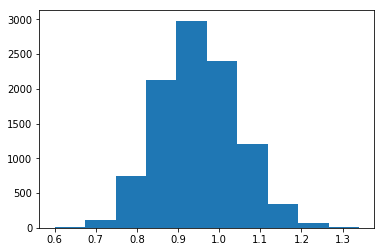

In [24]:
plt.hist(tau_MLE_boots)
plt.show()

In [20]:
# the std resulting from the bootstrap:
std_boots = np.std(tau_MLE_boots, ddof=1)
print(std_boots)

0.09455935099864081


In [15]:
# the analytical std:
std_an = np.sqrt(tau_MLE**2/N)
print(std_an)

0.09482394982391558


Studying relative error as a function of the # N_exp of bootstrap experiments

In [21]:
N_exp_arr=[10,100,500,1000,2000,5000,10000]
rel_error=[]
for N_exp in N_exp_arr:
    print('N_exp = ',N_exp)
    tau_MLE_boots = []
    for i in range(N_exp):
        data_n = np.random.exponential(scale=tau_MLE, size=N)
        tau_MLE_boots.append(np.mean(data_n))
    std_boots = np.std(tau_MLE_boots, ddof=1)
    rel_error.append(abs(std_an - std_boots)/std_an)
        

N_exp =  10
N_exp =  100
N_exp =  500
N_exp =  1000
N_exp =  2000
N_exp =  5000
N_exp =  10000


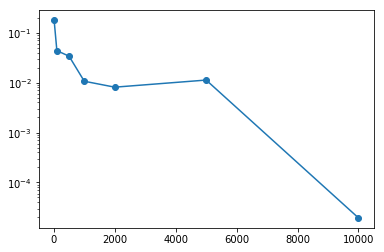

In [26]:
plt.plot(N_exp_arr,rel_error,marker='o')
plt.yscale('log')
plt.show()